# Исследование тарифов


## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import stats as st


In [2]:
df_user = pd.read_csv('/datasets/users.csv')
df_user.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [3]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Мы видим, что из всей выборки лишь у 38 пользователей стоит дата прекращения тарифа. Остальные продолжнают пользоваться тарифами.

In [4]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
df_messages = pd.read_csv('/datasets/messages.csv')
df_messages.head()


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
df_internet = pd.read_csv('/datasets/internet.csv')
df_internet.head()


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [9]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [10]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_tariffs.head()


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [12]:
# проверим , есть ли дубликаты.
df_user.duplicated().sum(), df_calls.duplicated().sum(), df_messages.duplicated().sum(), df_internet.duplicated().sum()

(0, 0, 0, 0)

Данные на первый взгляд хорошие. Необходимо только поменять тип object в колонке с датой звонка на data и округлить данные по минутам и интернет трафику в бОльшую стороны ( согласно условиям тарифа)

## Предобработка данных

Округлим минуты разговора и интернет трафик в бОльшую сторону (согласно условиям тарифа)

In [13]:
df_calls['duration']= df_calls['duration'].apply(np.ceil)
df_calls['duration'].head()

0     0.0
1     0.0
2     3.0
3    14.0
4     6.0
Name: duration, dtype: float64

In [14]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [15]:
# переведем Мб в Гб, а потом округлим в бОльшую сторону
df_internet['mb_used'] = df_internet['mb_used']/1024
df_internet['mb_used'] = df_internet['mb_used'].apply(np.ceil)

df_tariffs['mb_per_month_included'] = df_tariffs['mb_per_month_included']/1024
df_tariffs['mb_per_month_included'] = df_tariffs['mb_per_month_included'].apply(np.ceil)


Преобразуем тип object в колонках с датами в тип data

In [16]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

Создадим дополнительно столбец, в котором будет номер месяца ( это нам понадобиться для дальнейшей аналитики и подсчетов)

In [17]:
df_calls['month'] = df_calls['call_date'].dt.month
df_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


In [18]:
df_messages['month'] = df_messages['message_date'].dt.month
df_messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [19]:
df_internet['month'] = df_internet['session_date'].dt.month
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,1.0,2018-11-25,1000,11
1,1,1000_1,2.0,2018-09-07,1000,9
2,2,1000_2,2.0,2018-06-25,1000,6
3,3,1000_3,1.0,2018-08-22,1000,8
4,4,1000_4,1.0,2018-09-24,1000,9


 Найдем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам

In [20]:
calls = df_calls.groupby(['user_id', 'month']).agg({'duration': 'sum', 'id': 'count'}).reset_index()
calls = calls.rename(columns={'id' : 'calls_kol'})
calls.head()

,user_id,month,duration,calls_kol
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58


Найдем для каждого пользователя количество отправленных сообщений по месяцам

In [21]:
messages = df_messages.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()
messages = messages.rename(columns={'id' : 'messages_kol'})
messages.head()

,user_id,month,messages_kol
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Найдем для каждого пользователя объем израсходованного интернет-трафика по месяцам

In [22]:
internet = df_internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()
internet = internet.rename(columns={'mb_used' : 'gb_used'})
internet.head()

,user_id,month,gb_used
0,1000,5,4.0
1,1000,6,49.0
2,1000,7,28.0
3,1000,8,27.0
4,1000,9,26.0


Объединим получившиейся таблицы в одну

In [23]:
data = calls.merge(messages, on = ['user_id','month'], how = 'outer')
data = data.merge(internet, on = ['user_id','month'], how = 'outer')
data.head()

,user_id,month,duration,calls_kol,messages_kol,gb_used
0,1000,5,159.0,22.0,22.0,4.0
1,1000,6,172.0,43.0,60.0,49.0
2,1000,7,340.0,47.0,75.0,28.0
3,1000,8,408.0,52.0,81.0,27.0
4,1000,9,466.0,58.0,57.0,26.0


In [24]:
data_temp = df_user.merge(df_tariffs, left_on = 'tariff',  right_on = 'tariff_name', how = 'left')
data_temp.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,50,15.0,500,550,200,3,3,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15.0,500,550,200,3,3,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,1000,30.0,3000,1950,150,1,1,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30.0,3000,1950,150,1,1,ultra


In [25]:
data = data_temp.merge(data, on = ['user_id'], how = 'outer')
data.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,month,duration,calls_kol,messages_kol,gb_used
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,...,1950,150,1,1,ultra,5.0,159.0,22.0,22.0,4.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,...,1950,150,1,1,ultra,6.0,172.0,43.0,60.0,49.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,...,1950,150,1,1,ultra,7.0,340.0,47.0,75.0,28.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,...,1950,150,1,1,ultra,8.0,408.0,52.0,81.0,27.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,...,1950,150,1,1,ultra,9.0,466.0,58.0,57.0,26.0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 21 columns):
user_id                  3216 non-null int64
age                      3216 non-null int64
churn_date               189 non-null object
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null object
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null float64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
tariff_name              3216 non-null object
month                    3214 non-null float64
duration                 3174 non-null float64
calls_kol                3174 non-null float64
messages_kol            

Полагаем, что если в кол-ве звонков/смс/время звонка и интеренет трафике стоит NaN то это означает, что звонка/смс/использование трафика не было. И мы смело заменяем пустые значения на 0

In [27]:
data['duration'] = data['duration'].fillna(0)
data['calls_kol'] = data['calls_kol'].fillna(0)
data['messages_kol'] = data['messages_kol'].fillna(0)
data['gb_used'] = data['gb_used'].fillna(0)

data['calls_kol'].isna().sum(), data['duration'].isna().sum(), data['messages_kol'].isna().sum(),data['gb_used'].isna().sum()

(0, 0, 0, 0)

Теперь у нас есть таблица с данными для дальнейших расчетов.

Посчитаем помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

In [28]:
# посчитаем выручку отдельно по минутам, смс и интернету
data['minutes_over'] = (data['duration'] - data['minutes_included']) * data['rub_per_minute']
data['messages_over'] = (data['messages_kol'] - data['messages_included']) * data['rub_per_message']
data['internet_over'] = (data['gb_used'] - data['mb_per_month_included']) * data['rub_per_gb']

# убираем отрицательные значения - когда абонент не использовал включенные в тариф минуты и Гб.
data.loc[data['minutes_over'] < 0, 'minutes_over'] = 0
data.loc[data['messages_over'] < 0, 'messages_over'] = 0
data.loc[data['internet_over'] < 0, 'internet_over'] = 0

# считаем выручку
data['profit'] = data['minutes_over'] + data['messages_over'] + data['internet_over'] + data['rub_monthly_fee']


In [29]:
data.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,...,tariff_name,month,duration,calls_kol,messages_kol,gb_used,minutes_over,messages_over,internet_over,profit
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,...,ultra,5.0,159.0,22.0,22.0,4.0,0.0,0.0,0.0,1950.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,...,ultra,6.0,172.0,43.0,60.0,49.0,0.0,0.0,2850.0,4800.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,...,ultra,7.0,340.0,47.0,75.0,28.0,0.0,0.0,0.0,1950.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,...,ultra,8.0,408.0,52.0,81.0,27.0,0.0,0.0,0.0,1950.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,...,ultra,9.0,466.0,58.0,57.0,26.0,0.0,0.0,0.0,1950.0


Теперь у нас есть готовая и полная таблица для дальнейшего анализа.

## Анализ данных

Посмотрим, сколько минут разговора тратится для каждого тарифа.

### Данные по звонкам

In [30]:
# посмотрим на характеристики по затраченным минутам на звонки
data.groupby('tariff_name').agg({'duration': ['mean','std','var','median']})

duration                                  
                   mean         std            var median
tariff_name                                              
smart        417.747534  190.476754   36281.393836  421.5
ultra        526.089249  317.887549  101052.493549  518.0

Из полученных данных можно сделать вывод, что по тарифу smart - среднее время разговора в месяц составляет 418 минут. По тарифу  ultra - 526 минут.  Но величина стандартного отклонения достаточно большая, что говорит о том, что есть большой разброс значений. При чем на тафире ultra этот разброс больше ( хвост длиннее)

Построим гистограмму

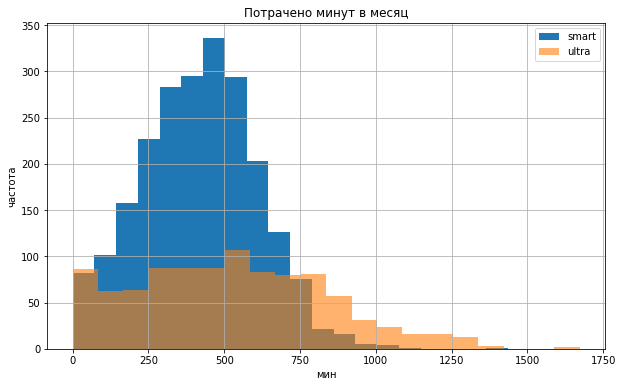

In [31]:
ax = data[data['tariff_name'] == 'smart']['duration'].hist(bins = 20,figsize = (10,6),label = 'smart',grid = True)
data[data['tariff_name'] == 'ultra']['duration'].hist(ax=ax,alpha = 0.6,bins = 20,label = 'ultra')
plt.title ('Потрачено минут в месяц')
plt.legend()
plt.xlabel('мин')
plt.ylabel('частота')
plt.show()

Из графика видно, то на тарифе smart большинство абонентов тратит до 500 минут в месяц ( не превышая кол-во включенных минут в тарифе), но довольно много абонентов выходят за грань в 500 минут.
На тарифе smart абоненты в среднем тратят до 800 минут в месяц. Включенные в тариф 3000 минут практически никто не выговаривает.

### Данные по смс

In [32]:
# посмотрим на характеристики по кол-ву смс 
data.groupby('tariff_name').agg({'messages_kol': ['mean','std','var','median']})

messages_kol                               
                    mean        std          var median
tariff_name                                            
smart          33.369058  28.230396   796.955256   28.0
ultra          49.313387  47.806040  2285.417425   38.0

Здесь видим очень большой разброс значение на обоих тарифах. Стандартное отклонение почти равно среднему значению. 
Среднее кол-во смс на тарифе smart - 33 смс, а на тарифе ultra - 49 смс. Хотя правильнее было опираться на значения медианы, а не на среднее. 
По полученным данным мы видим, что датасет скошен вправо, т.к. среднее больше медианы

Построим график

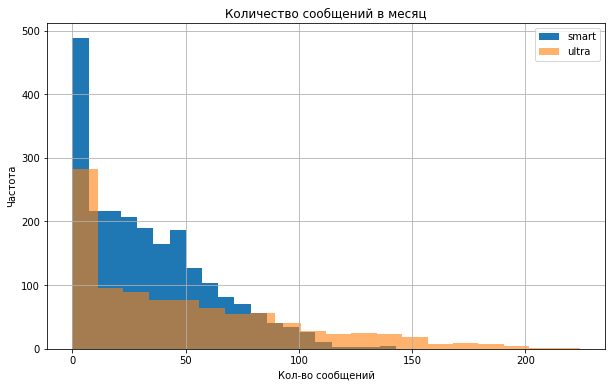

In [33]:
ax = data[data['tariff_name'] == 'smart']['messages_kol'].hist(bins = 20,figsize = (10,6),label = 'smart',grid = True)
data[data['tariff_name'] == 'ultra']['messages_kol'].hist(ax=ax,alpha = 0.6,bins = 20,label = 'ultra')
plt.title ('Количество сообщений в месяц')
plt.legend()
plt.xlabel('Кол-во сообщений')
plt.ylabel('Частота')
plt.show()

Здесь мы так же видим, что на тарифе smart большая часть абонентов отправляет 50 смс в месяц (кол-во смс включенные в тарифный план = 50). Но так же есть группа абонентов, которые отправляют значительно больше смс в месяц.

На тарифе ultra основная масса абоненов отправляет 10 смс в месяц, следующая группа абонентов напрявляет до 100 смс в месяц.Но даже при таких показателях, абоненты не выходят за кол-во смс, которые включены в тариф ( 1000 смс)


### Данные по интернет трафику

In [34]:
# посмотрим на характеристики по интернет трафику
data.groupby('tariff_name').agg({'gb_used': ['mean','std','var','median']})

gb_used                              
                  mean        std         var median
tariff_name                                         
smart        42.399103  14.966731  224.003050   43.0
ultra        38.125761  19.592457  383.864371   38.0

Здесь разброс уже меньше. Среднее практически совпадает с медианой значений.Значения по интернет трафику имею нормальное распределение. В среднем на тарифе smart используется 42 Гб трафика, на тарифе ultra - 38 Гб трафика.

Посмотрим, сколько тратится интернет трафика для каждого тарифа.

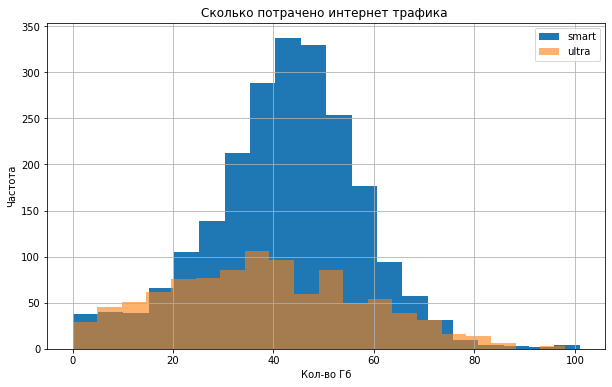

In [35]:
ax = data[data['tariff_name'] == 'smart']['gb_used'].hist(bins = 20,figsize = (10,6),label = 'smart',grid = True)
data[data['tariff_name'] == 'ultra']['gb_used'].hist(ax=ax,alpha = 0.6,bins = 20,label = 'ultra')
plt.title ('Сколько потрачено интернет трафика ')
plt.legend()
plt.xlabel('Кол-во Гб')
plt.ylabel('Частота')
plt.show()

А вот тут интересная картина. Несмотря на то, что на тарифе smart включено всего 15 Гб трафика, большая часть абонентов тратит 40-50 Гб интернета. В то время , как на тарифе ultra, абоненты большая часть абонентов тратит до 55 Гб, что, впринципе тоже превышает включенный объем трафика (30 Гб)

### Данные по выручке

In [36]:
# посмотрим на характеристики по выручке 
data.groupby('tariff_name').agg({'profit': ['mean','std','var','median']})

profit                                   
                    mean          std           var  median
tariff_name                                                
smart        6244.529596  2895.582681  8.384399e+06  6350.0
ultra        3842.494929  2165.879726  4.691035e+06  3150.0

Если верить данным, то на тарифе smart выручка в 2 раза выше, чем на тарифе ultra. Скорее всего это свзяано с тем, что абоненты smart чаще выходят за пределы предоставленных лимитов по тарифу и производят оплату сверх тарифа. А абоненты ultra практически всегда укладываются в предоставленные по тарифу лимиты.

## Проверка гипотез


### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. 

Нулевая гипотеза - выручка по тарифам одинаковая

Альтернативная гипотеза - выручка по тарифам разная

In [37]:
data_smart = data[data['tariff_name'] == 'smart']['profit']
data_ultra = data[data['tariff_name'] == 'ultra']['profit']

In [38]:
data_smart.head()

8     6950.0
9     4550.0
10    2950.0
11    6550.0
12    7550.0
Name: profit, dtype: float64

In [39]:
data_ultra.head()

0    1950.0
1    4800.0
2    1950.0
3    1950.0
4    1950.0
Name: profit, dtype: float64

In [40]:
alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(data_smart, data_ultra)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение:  2.8106330183719197e-111
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута. Делаем вывод, что выручка у тарифов разная.

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Нулевая гипотеза - выручка для Москвы и для других регионов одинаковая

Альтернативная гипотеза - выручка для Москвы и др.регионов разная

In [41]:
data_smart_city = data[(data['tariff_name'] == 'smart') & (data['city'] == 'Москва')]['profit']
data_ultra_city = data[(data['tariff_name'] == 'ultra') & (data['city'] == 'Москва')]['profit']

In [42]:
data_smart_city.head()

8     6950.0
9     4550.0
53    1150.0
54    6950.0
55    5085.0
Name: profit, dtype: float64

In [43]:
data_ultra_city.head()

17    1950.0
18    1950.0
19    1950.0
20    1950.0
21    1950.0
Name: profit, dtype: float64

In [44]:
alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(data_smart_city, data_ultra_city)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  3.061718233784844e-17
Отвергаем нулевую гипотезу


## Вывод

Проанализировав данные, мы может сказать, что тариф smart приносит больше прибыли, чем тариф ultra. Скорее всего это связано с тем, что абонентам тарифа ultra хватает включенных в тариф услуг ( за исклбчанием интернет трафика). В то время как на тарифе smart, абонентам, в большей степерни, не хватает включенных в тариф услуг и они чаще оплачивают дополнительные минуты, смс, интернет, что приводит к увеличению выручки по данному тарифу. Так же выяснилось, что выручка для Москвы и для других регионов разная.Что, скорее всего, связано с количеством проживающих людей в Мосвке.